# TITLE IMAGE GOES HERE

---

# Executive Summary


## Project Description:

Our team accessed the U.S. Department of Transportation’s database to analyze 8 years of rail accidents across the United States. We utilized the full data science pipeline to analyze the data and create a classification model that would predict which company would be involved in a rail accident.


## Project Goals
- Determine which features are drivers of highway rail accidents and equipment rail accidents.
- Build a classification model for predicting which Railroad operator is most likely to be involved with a given accident. This information is used to enhance the overall analysis.


## Key Findings




---

# Imports and Set-Up

In [2]:
#Imports

#Common Python Libraries
import pandas as pd
import numpy as np

#import stats and testing
from scipy import stats

#Modules we created 
import acquire
import prepare
import explore
import preprocessing

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

---

# Rail Equipment Data

# Step 1: Data Acquisition
> The data was obtained from the U.S. Department of Transportation:
        > - Data includes U.S. rail accidents from 2012-2020 for equipment and highway rail accidents <br>
        > - Data Structure: Two data frames, one for Highway Rail Accidents and the other for Rail Equipment Accidents 

## Acquire - Rail Equipment Data

In [3]:
#Acquire data using acquire.py module and get_equiprail function
df = acquire.get_equiprail()
#Preview the shape of the acquired dataframe 
df.head()

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,...,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,Unnamed: 145
0,12,5,BNSF,GC0512102,NaN,NaN,NaN,NaN,12,5,...,0.0,29.755900,-95.293100,1,1,G,NaN,NaN,NORTH SHORE,NaN
1,12,5,BNSF,GC0512105,NaN,NaN,NaN,NaN,12,5,...,0.0,29.500571,-95.597089,2,5,Z,NaN,NaN,GALVESTON,NaN
2,12,2,NS,98074,12.0,2.0,CSX,100906,12,2,...,NaN,34.612981,-86.988133,1,1,B,NaN,NaN,ALABAMA,NaN
3,12,5,BNSF,GC0512106,NaN,NaN,NaN,NaN,12,5,...,0.0,31.446576,-96.207606,2,5,Z,NaN,NaN,HOUSTON,NaN
4,12,5,BNSF,GC0512112,NaN,NaN,NaN,NaN,12,5,...,0.0,29.772155,-95.384013,2,5,Z,NaN,NaN,HOUSTON,NaN


**Takeaways:**

---

# Step 2: Data Preparation

> **Our approach:**
    > - lkjdlsakfjalsd


## Prepare - Rail Equipment Data

In [5]:
df = prepare.prep_equip_df(df)
df.shape

(11504, 35)

**Takeaways:**

---

# Step 3: Data Exploration

> **Our approach:**
    > - Split the data to explore on the training data set
    > - Run univariate, bivariate, and  multivariate visulaizations for how features interact with each other and the target, railroad_company
    > - Run statistical tests to help answer questions that arose from exploration

## Explore - Rail Equipment Data

### Univariate Exploration - Rail Equipment 

In [6]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

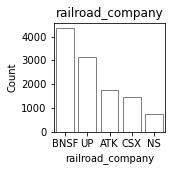

     railroad_company  Count  Percent
UP               BNSF   4345    37.77
BNSF               UP   3160    27.47
NS                ATK   1774    15.42
CSX               CSX   1482    12.88
ATK                NS    743     6.46
_________________________________________________________________


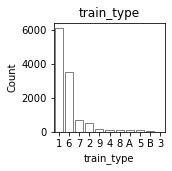

  train_type  Count  Percent
1          1   6122    53.22
7          6   3522    30.62
8          7    696     6.05
2          2    501     4.36
6          9    194     1.69
A          4    128     1.11
5          8    102     0.89
4          A     87     0.76
9          5     86     0.75
B          B     63     0.55
3          3      3     0.03
_________________________________________________________________


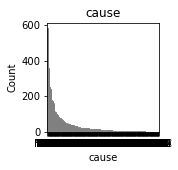

     cause  Count  Percent
H702  H503    582     5.06
M302  T111    548     4.76
T110  M404    474     4.12
H307  T314    356     3.09
T207  T102    345     3.00
...    ...    ...      ...
E11C  E77L      1     0.01
H199  E75L      1     0.01
E29L  H699      1     0.01
E10L  H104      1     0.01
T302  E81C      1     0.01

[326 rows x 3 columns]
_________________________________________________________________


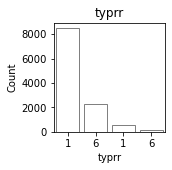

  typrr  Count  Percent
1     1   8487    73.77
1     6   2274    19.77
6     1    567     4.93
6     6    176     1.53
_________________________________________________________________


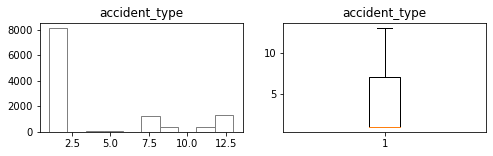

count    11504.000000
mean         3.546506
std          4.204409
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max         13.000000
Name: accident_type, dtype: float64


TypeError: unsupported operand type(s) for /: 'str' and 'int'

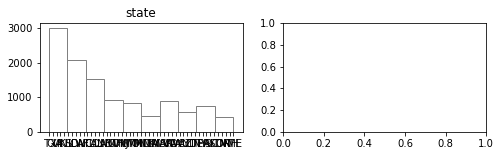

In [7]:
explore.explore_univariate(df, cat_vars, quant_vars)

### More Univariate Exploration - Rail Equipment 

In [8]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["total_killed", "total_injured", "max_speed", "total_damage", 
              "engineers_onduty", "conductors_onduty", "brakemen_onduty", "region",
             "signal_type"]

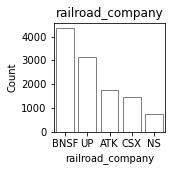

     railroad_company  Count  Percent
UP               BNSF   4345    37.77
BNSF               UP   3160    27.47
NS                ATK   1774    15.42
CSX               CSX   1482    12.88
ATK                NS    743     6.46
_________________________________________________________________


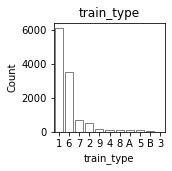

  train_type  Count  Percent
1          1   6122    53.22
7          6   3522    30.62
8          7    696     6.05
2          2    501     4.36
6          9    194     1.69
A          4    128     1.11
5          8    102     0.89
4          A     87     0.76
9          5     86     0.75
B          B     63     0.55
3          3      3     0.03
_________________________________________________________________


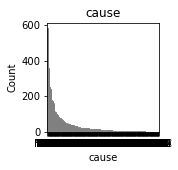

     cause  Count  Percent
H702  H503    582     5.06
M302  T111    548     4.76
T110  M404    474     4.12
H307  T314    356     3.09
T207  T102    345     3.00
...    ...    ...      ...
E11C  E77L      1     0.01
H199  E75L      1     0.01
E29L  H699      1     0.01
E10L  H104      1     0.01
T302  E81C      1     0.01

[326 rows x 3 columns]
_________________________________________________________________


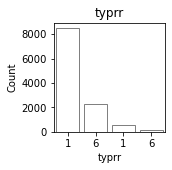

  typrr  Count  Percent
1     1   8487    73.77
1     6   2274    19.77
6     1    567     4.93
6     6    176     1.53
_________________________________________________________________


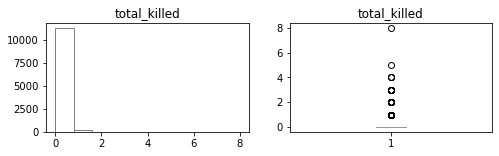

count    11504.000000
mean         0.023818
std          0.205013
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: total_killed, dtype: float64


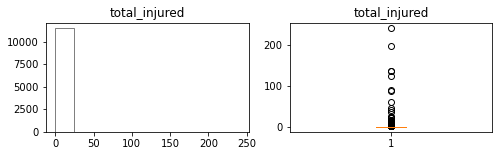

count    11504.000000
mean         0.229833
std          3.959022
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        241.000000
Name: total_injured, dtype: float64


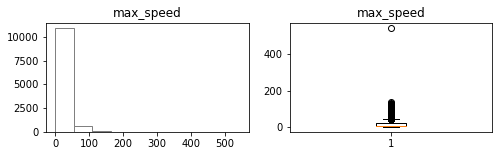

count    11504.000000
mean        15.516951
std         19.524555
min          0.000000
25%          4.000000
50%          7.000000
75%         19.000000
max        545.000000
Name: max_speed, dtype: float64


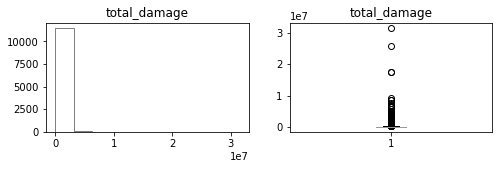

count    1.150400e+04
mean     1.625800e+05
std      6.325089e+05
min      3.200000e+01
25%      1.770250e+04
50%      3.319850e+04
75%      9.010125e+04
max      3.153875e+07
Name: total_damage, dtype: float64


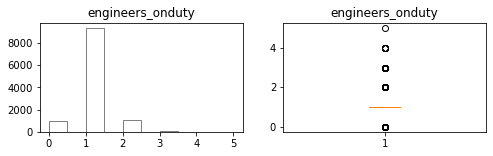

count    11504.000000
mean         1.022427
std          0.467701
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: engineers_onduty, dtype: float64


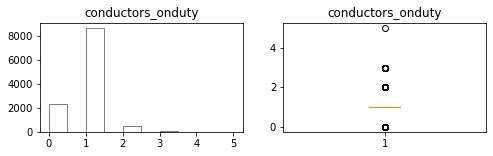

count    11504.000000
mean         0.844750
std          0.480039
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: conductors_onduty, dtype: float64


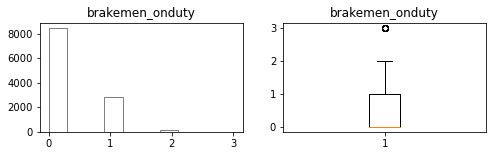

count    11504.000000
mean         0.283032
std          0.491291
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: brakemen_onduty, dtype: float64


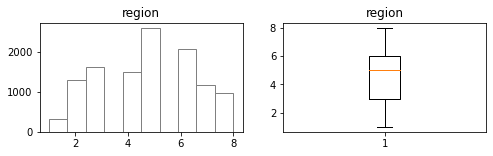

count    11504.000000
mean         4.775643
std          1.856542
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: region, dtype: float64


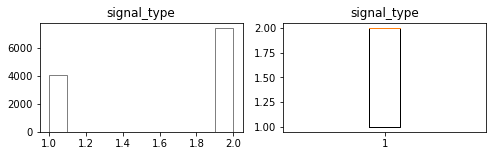

count    11504.000000
mean         1.647340
std          0.477819
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: signal_type, dtype: float64


In [9]:
explore.explore_univariate(df, cat_vars, quant_vars)

**Explore Outliers**

In [9]:
def outlier_report(df):
    '''
    This function takes in a data frame and returns
    print statments stating the upper and lower bound outliers for 
    each column
    '''
    
    columns_to_check = ["temp",
                        "train_speed",
                        "train_weight",
                        "equip_damage",
                        "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                        "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    
    for col in columns_to_check:
        quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
        iqr = quartile_03 - quartile_01
    
        lower_bound = round(quartile_01 -(2 * iqr), 3)
        upper_bound = round(quartile_03 +(2 * iqr), 3)
    
        #df['outlier'] = df[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    

        print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

In [10]:
outlier_report(df)

The lower and upper bound of the range for 'temp' respectively is: -26.0 and 144.0
The lower and upper bound of the range for 'train_speed' respectively is: -26.0 and 49.0
The lower and upper bound of the range for 'train_weight' respectively is: -13366.0 and 20049.0
The lower and upper bound of the range for 'equip_damage' respectively is: -67789.75 and 126031.5
The lower and upper bound of the range for 'track_damage' respectively is: -54594.5 and 82034.25
The lower and upper bound of the range for 'total_killed' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'total_injured' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'max_speed' respectively is: -26.0 and 49.0
The lower and upper bound of the range for 'total_damage' respectively is: -127095.0 and 234898.75
The lower and upper bound of the range for 'engineers_onduty' respectively is: 1.0 and 1.0
The lower and upper bound of the range for 'conductors_onduty' respectively is: 1.0 a

In [11]:
def visualize_outliers(df):
    '''
    This function takes in a dataframe
    and outputs boxplots to show outlier distribution
    for each column in the the dataframe
    '''
    cols_to_check = ["temp",
                    "train_speed",
                    "train_weight",
                    "equip_damage",
                    "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                    "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    for col in cols_to_check:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

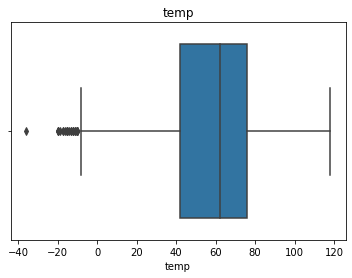

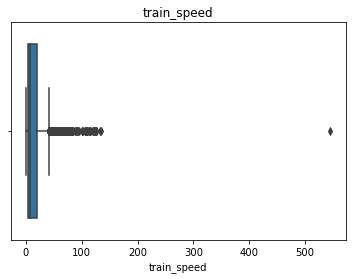

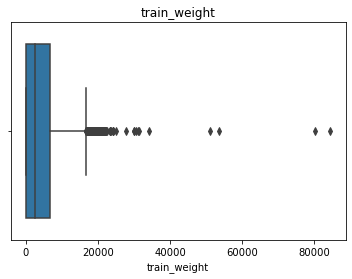

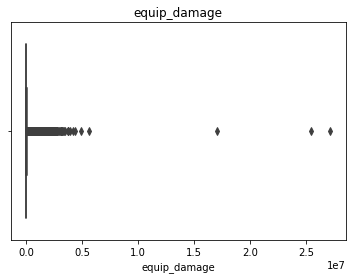

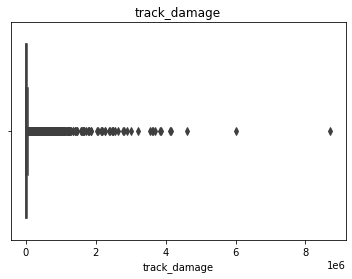

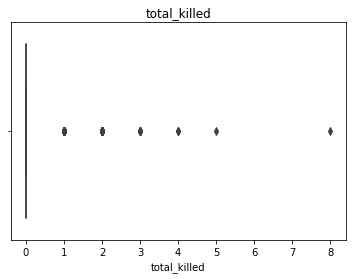

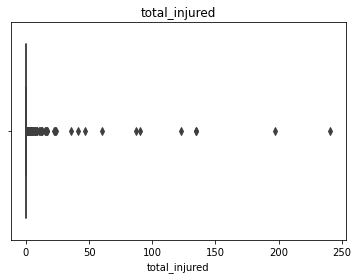

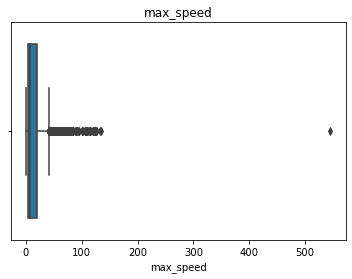

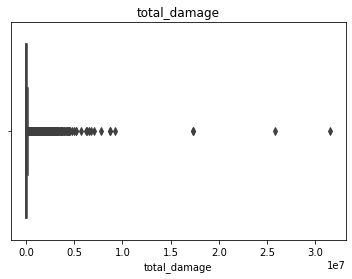

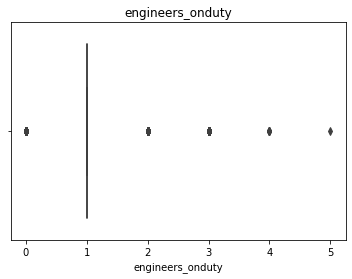

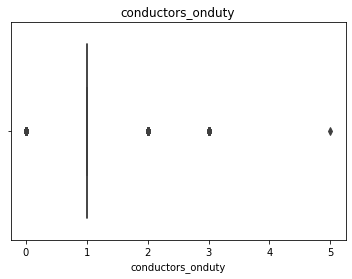

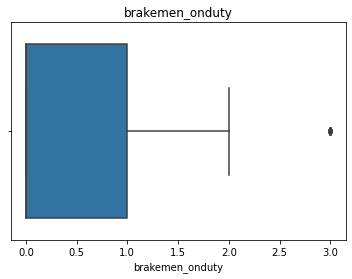

In [12]:
visualize_outliers(df)

**Takeaways:**
   - Need to investigate outliers in:
        - max_speed & train speed...one over 500 mph
        - train weight
        - one super negative temp

**Split the Data**

In [13]:
train, validate, test = explore.train_validate_test_split(df, 'railroad_company', seed=444)
print(f'Train Shape: {train.shape}')
print(f'Validate Shape: {validate.shape}')
print(f'Test Shape: {test.shape}')

Train Shape: (6442, 32)
Validate Shape: (2761, 32)
Test Shape: (2301, 32)


**Is there a time of year where rail equipment accidents happen with more or less frequency?**

In [ ]:
train['month'] = pd.DatetimeIndex(train['date']).month
train.head()

In [ ]:
train.month.hist()

In [ ]:
train['season'] = train.month.apply(lambda x: "winter/fall" if x == 10 or 11 == 12 or x == 1 or x == 2 or x == 3 else "summer/spring")
train.head()
        

In [ ]:
train.season.hist()

**Takeaways:**
- Rail equipment accidents appear to happen more frequently in summer/spring months than in winter/fall months 

**What is the distribution of track damages?**

<AxesSubplot:>

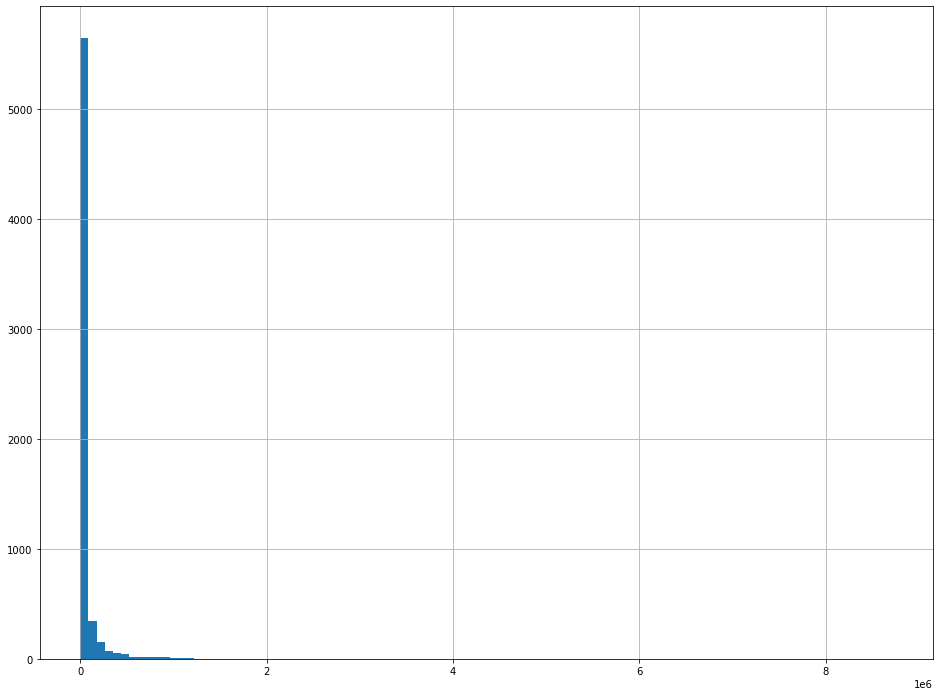

In [25]:
plt.figure(figsize=(16,12))
train.track_damage.hist(bins=100)

---

**Explore Bivariate**

In [14]:
def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, 'railroad_company', cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, 'railroad_company', quant)


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='white', edgecolor='grey')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='white', edgecolor='grey')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
   # p = plot_cat_by_target(train, target, cat_var)
    
    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    #plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

#def plot_cat_by_target(train, target, cat_var):
#    p = plt.figure(figsize=(2,2))
#    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
#    overall_rate = train[target].mean()
#    p = plt.axhline(overall_rate, ls='--', color='gray')
#    return p
    

## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)

In [15]:
#Breakdown the features by categories for Univariate and Bivariate Functions from Explore Module
categorical_target = 'railroad_company'
cat_vars = ["train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

train_type 
_____________________

          chi2  p-value  degrees of freedom
0  5206.398799      0.0                  40

observed:
 railroad_company  ATK  BNSF  CSX   NS    UP   All
train_type                                       
1                   1   941  502  582  1394  3420
2                 278     1    1    1     0   281
3                   3     0    0    0     0     3
4                   6     5    1   12    25    49
5                   0     5   16    3    34    58
6                   0    15   68   20     8   111
7                  41   620  216  302   777  1956
8                  51   119   20   68   154   412
9                   2    46    2    0     2    52
A                   4    17    4    5    39    69
B                  30     1    0    0     0    31
All               416  1770  830  993  2433  6442

expected:
              0           1           2           3            4
0   220.850667  939.677119  440.639553  527.174790  1291.657870
1    18.145917   77.20738

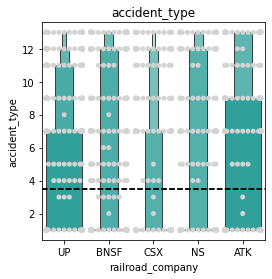

                   count      mean       std  min  25%  50%  75%   max
railroad_company                                                      
ATK                416.0  7.045673  4.229025  1.0  1.0  7.0  9.0  13.0
BNSF              1770.0  3.205085  4.127186  1.0  1.0  1.0  1.0  13.0
CSX                830.0  2.897590  3.687146  1.0  1.0  1.0  1.0  13.0
NS                 993.0  3.103726  4.085073  1.0  1.0  1.0  1.0  13.0
UP                2433.0  3.466502  4.113996  1.0  1.0  1.0  7.0  13.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

state 
____________________



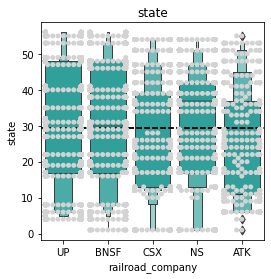

                   count       mean        std  min   25%   50%   75%   max
railroad_company                                                           
ATK                416.0  24.963942  15.224304  1.0  11.0  24.0  37.0  55.0
BNSF              1770.0  30.538983  15.672305  1.0  17.0  30.0  48.0  56.0
CSX                830.0  28.360241  15.020424  1.0  13.0  26.0  39.0  54.0
NS                 993.0  30.204431  15.748256  1.0  17.0  37.0  42.0  54.0
UP                2433.0  29.403617  16.982814  4.0  17.0  29.0  48.0  56.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

temp 
____________________



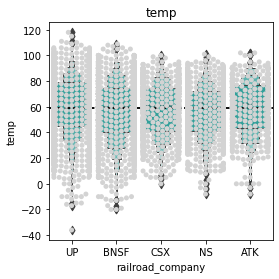

                   count       mean        std   min    25%   50%   75%    max
railroad_company                                                              
ATK                416.0  59.502404  22.116776  -8.0  43.75  62.0  77.0  102.0
BNSF              1770.0  56.168362  23.613764 -20.0  40.00  59.5  75.0  109.0
CSX                830.0  58.408434  21.270177   0.0  41.00  61.0  75.0  100.0
NS                 993.0  58.249748  20.466487  -8.0  41.00  63.0  72.0  101.0
UP                2433.0  61.434854  22.488373 -36.0  45.00  65.0  79.0  118.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

visibility 
____________________



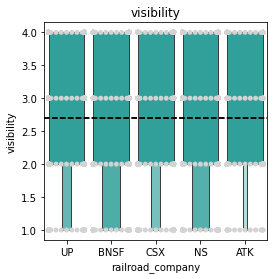

                   count      mean       std  min  25%  50%  75%  max
railroad_company                                                     
ATK                416.0  2.718750  0.981876  1.0  2.0  2.0  4.0  4.0
BNSF              1770.0  2.632203  1.084753  1.0  2.0  2.0  4.0  4.0
CSX                830.0  2.809639  1.052267  1.0  2.0  3.0  4.0  4.0
NS                 993.0  2.683787  1.074216  1.0  2.0  2.0  4.0  4.0
UP                2433.0  2.732840  1.038397  1.0  2.0  2.0  4.0  4.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

weather 
____________________



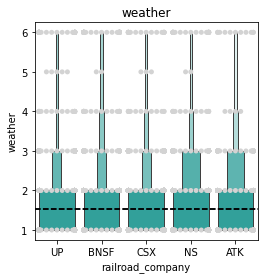

                   count      mean       std  min  25%  50%  75%  max
railroad_company                                                     
ATK                416.0  1.490385  1.010739  1.0  1.0  1.0  2.0  6.0
BNSF              1770.0  1.458192  0.993309  1.0  1.0  1.0  2.0  6.0
CSX                830.0  1.573494  0.986652  1.0  1.0  1.0  2.0  6.0
NS                 993.0  1.551863  1.008822  1.0  1.0  1.0  2.0  6.0
UP                2433.0  1.547472  0.873770  1.0  1.0  1.0  2.0  6.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

train_speed 
____________________



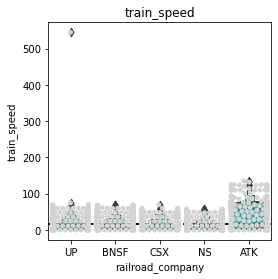

                   count       mean        std  min  25%   50%   75%    max
railroad_company                                                           
ATK                416.0  47.615385  35.450507  0.0  5.0  57.0  76.0  135.0
BNSF              1770.0  12.719209  14.263083  0.0  5.0   7.0  10.0   69.0
CSX                830.0  12.798795  13.541849  0.0  4.0   7.0  15.0   70.0
NS                 993.0  10.582075  12.658255  0.0  4.0   6.0  10.0   58.0
UP                2433.0  14.885327  19.365267  0.0  4.0   7.0  20.0  545.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

train_direction 
____________________



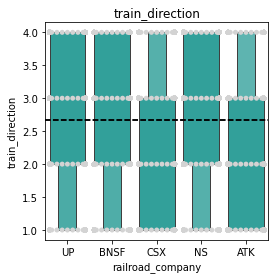

                   count      mean       std  min  25%  50%  75%  max
railroad_company                                                     
ATK                416.0  2.403846  1.136634  1.0  1.0  2.0  3.0  4.0
BNSF              1770.0  2.905650  1.035067  1.0  2.0  3.0  4.0  4.0
CSX                830.0  2.302410  1.122795  1.0  1.0  2.0  3.0  4.0
NS                 993.0  2.713998  1.112962  1.0  2.0  3.0  4.0  4.0
UP                2433.0  2.661323  1.092914  1.0  2.0  3.0  4.0  4.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

train_weight 
____________________



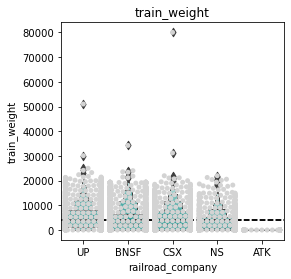

                   count         mean          std  min     25%     50%  \
railroad_company                                                          
ATK                416.0     0.000000     0.000000  0.0     0.0     0.0   
BNSF              1770.0  4323.719209  5481.048433  0.0     0.0  2439.5   
CSX                830.0  4431.263855  5968.455090  0.0     0.0  1972.5   
NS                 993.0  2935.521652  4267.509535  0.0     0.0   297.0   
UP                2433.0  5410.782162  5195.444542  0.0  1244.0  3933.0   

                     75%      max  
railroad_company                   
ATK                  0.0      0.0  
BNSF              6463.0  34247.0  
CSX               7674.5  80043.0  
NS                5110.0  22000.0  
UP                8009.0  51015.0   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

equip_damage 
____________________



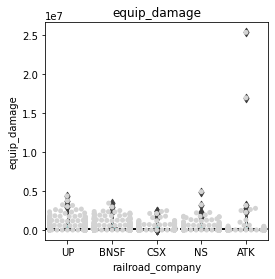

                   count           mean           std  min       25%      50%  \
railroad_company                                                                
ATK                416.0  177236.603365  1.523030e+06  0.0  12999.00  20000.0   
BNSF              1770.0  100013.118644  3.054684e+05  0.0   9425.00  18000.0   
CSX                830.0   93358.756627  2.376496e+05  0.0  14035.25  27048.0   
NS                 993.0   83874.135952  2.982422e+05  0.0   5150.00  14350.0   
UP                2433.0   94633.482532  3.015323e+05  0.0   7981.00  18091.0   

                       75%         max  
railroad_company                        
ATK               36242.50  25406000.0  
BNSF              45000.00   3450302.0  
CSX               69755.75   2485861.0  
NS                33400.00   4931037.0  
UP                50933.00   4395775.0   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

track_damage 
____________________



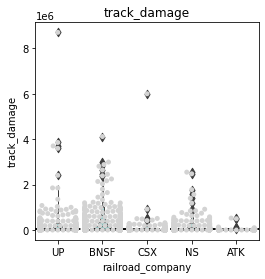

                   count          mean            std  min    25%     50%  \
railroad_company                                                            
ATK                416.0   5787.634615   37058.025101  0.0    0.0     0.0   
BNSF              1770.0  86942.835028  276526.983915  0.0    0.0  7150.0   
CSX                830.0  27316.419277  217014.937544  0.0  100.0  1500.0   
NS                 993.0  46695.174220  173802.211877  0.0  500.0  9355.0   
UP                2433.0  55038.180025  253320.686875  0.0  200.0  7460.0   

                      75%        max  
railroad_company                      
ATK                1000.0   525000.0  
BNSF              40000.0  4119720.0  
CSX               10203.0  6005760.0  
NS                25125.0  2549657.0  
UP                39162.0  8711005.0   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________



In [17]:
explore_bivariate(train, 'railroad_company', cat_vars, quant_vars)

**How do total damages compare by railroad?**

<AxesSubplot:xlabel='railroad_company'>

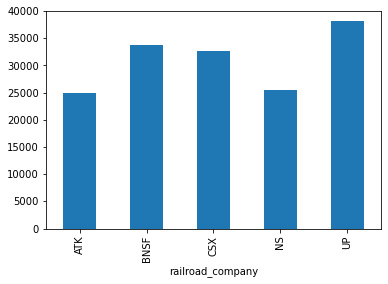

In [59]:
train.groupby('railroad_company').total_damage.median().plot(kind='bar')

**Takeaways:**
   - UP equipment accidents result in higher median total damages
   - Temperature spread is varied by railroad...Is this beacuse certain railroads operate in more specific climates?
   - Accident type should be a categorical value
   - Amtrak trains travel at higher speeds than other Railroads
   - BNSF accidents seem to incur > track damages on average
   - Amtrak incidents are missing train weight data

---

**Equipment Multivariate Exploration**

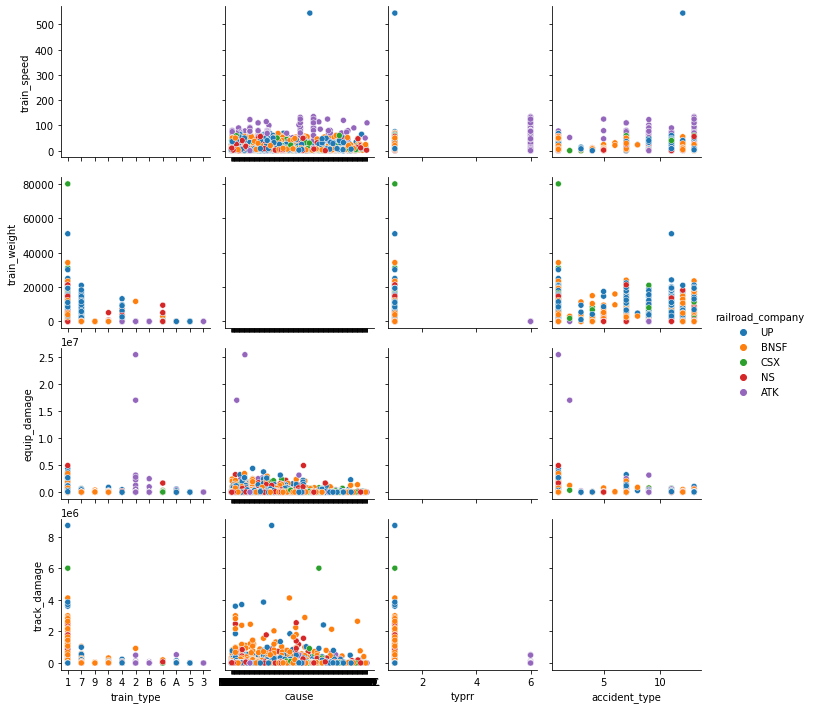

In [18]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "cause", "typrr", "accident_type"],
             y_vars = ["train_speed","train_weight", "equip_damage", "track_damage"])

**Takeaways**
   - Amtrak trains go faster than non amtrck trains.
   - Pairplot seems to confer that BNSF equipment accidents result in > track damages. 

In [ ]:
"temp",
                        "train_speed",
                        "train_weight",
                        "equip_damage",
                        "track_damage","total_killed", "total_injured", "max_speed", "total_damage"

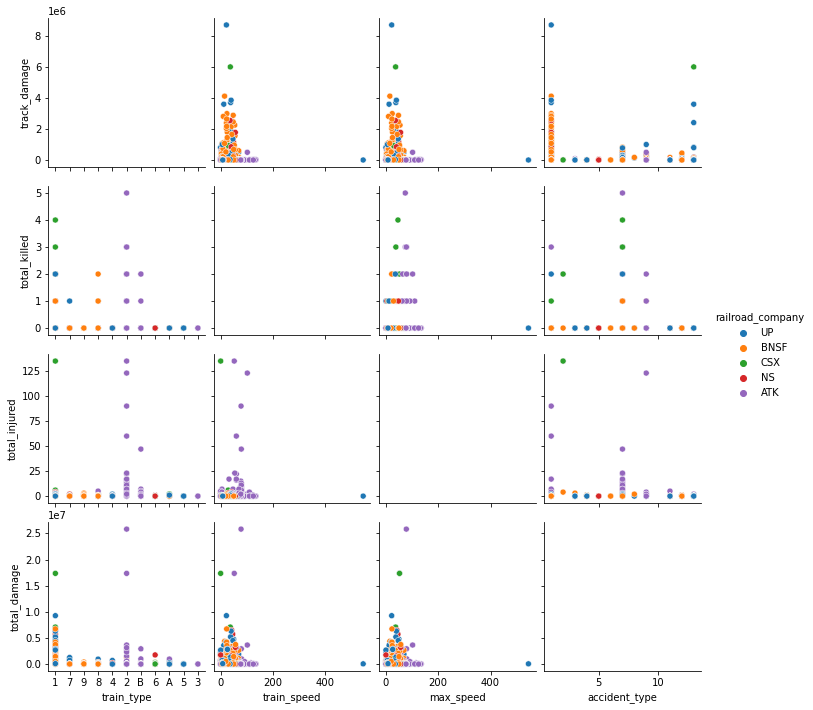

In [19]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "train_speed",
                        "max_speed", "accident_type"],
             y_vars = ["track_damage","total_killed", "total_injured", "total_damage"])

**Takeaways:**
   - Amtrak seems to be the exception for the observation that the > the train speed, the > the track damage.
   - Conversely, the greater the train speed for an Amtrak train, the > total_injured
   - Equipment rail incidents result in higher rates of injuries than in deaths

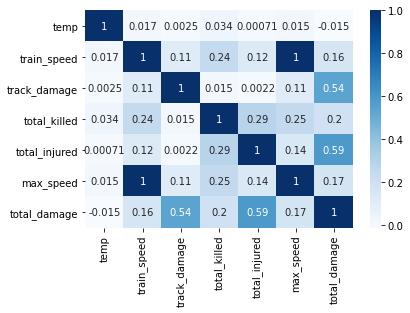

In [29]:
sns.heatmap(train[["temp", "train_speed","track_damage","total_killed", "total_injured", "max_speed", "total_damage"]].corr(), cmap='Blues', annot=True)
plt.show()

**Takeaways**
   - The most interesting thing here is that total_injured is fairly correlated with total_damaged

## Questions from Exploration to Explore With Statistical Testing

**Do Amtrak Equipment Incidents Result in Higher Track Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that track_damage is not normally distirbuted<br>
**H<sub>o</sub>: Amtrack equipment accidents do not result in higher track damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: Amtrack equipment accidents do result in higher track damages**

In [37]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that track_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].track_damage
x2 = train[train.railroad_company != 'ATK'].track_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2)

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:557429.5 and the p-value is 1.247024682368017e-81
We reject the null hypothesis.


**Do Amtrak Equipment Incidents Result in Higher Total Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that total_damage is not normally distirbuted<br>
**H<sub>o</sub>: Amtrack equipment accidents do not result in higher total damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: Amtrack equipment accidents do result in higher total damages**

In [44]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].total_damage
x2 = train[train.railroad_company != 'ATK'].total_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2)

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:1019837.0 and the p-value is 9.667047750112241e-11
We reject the null hypothesis.


**Is train_speed a effective feature for classifying railroad involved in an equipment accident?**

In [45]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].train_speed
x2 = train[train.railroad_company != 'ATK'].train_speed

#Run the test
t, p = stats.mannwhitneyu(x1, x2)

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:614695.5 and the p-value is 1.5037738594455814e-68
We reject the null hypothesis.


**Is train_type related to railroad?**

Chi Squared Test for examining the relationship between two categorical variables<br>
**H<sub>o</sub>: Train type is independent of railroad.<br>
H<sub>a</sub>: Train type has dependent on railroad.**

In [62]:
observed = pd.crosstab(train.railroad_company, train.train_type)
observed

train_type,1,2,3,4,5,6,7,8,9,A,B
railroad_company,,,,,,,,,,,
ATK,1,278,3,6,0,0,41,51,2,4,30
BNSF,941,1,0,5,5,15,620,119,46,17,1
CSX,502,1,0,1,16,68,216,20,2,4,0
NS,582,1,0,12,3,20,302,68,0,5,0
UP,1394,0,0,25,34,8,777,154,2,39,0


In [63]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[   1  278    3    6    0    0   41   51    2    4   30]
 [ 941    1    0    5    5   15  620  119   46   17    1]
 [ 502    1    0    1   16   68  216   20    2    4    0]
 [ 582    1    0   12    3   20  302   68    0    5    0]
 [1394    0    0   25   34    8  777  154    2   39    0]]
---
Expected

[[2.20850667e+02 1.81459174e+01 1.93728656e-01 3.16423471e+00
  3.74542068e+00 7.16796026e+00 1.26311084e+02 2.66054020e+01
  3.35796337e+00 4.45575908e+00 2.00186278e+00]
 [9.39677119e+02 7.72073890e+01 8.24278174e-01 1.34632102e+01
  1.59360447e+01 3.04982925e+01 5.37429370e+02 1.13200869e+02
  1.42874884e+01 1.89583980e+01 8.51754114e+00]
 [4.40639553e+02 3.62045948e+01 3.86525924e-01 6.31325675e+00
  7.47283452e+00 1.43014592e+01 2.52014902e+02 5.30828935e+01
  6.69978268e+00 8.89009624e+00 3.99410121e+00]
 [5.27174790e+02 4.33146538e+01 4.62434027e-01 7.55308910e+00
  8.94039118e+00 1.71100590e+01 3.01506985e+02 6.35076063e+01
  8.01552313e+00 1.06359826e+01 4.77848494e+0

**Takeaway:**
- The chi squared test revealed there is likely a significant relationship between the type of train and the railroad.
- Type of train would be a good feature for predicting railroad company, but it may result in too much coliniarity

---

**What features should be carried over to modeling for Equipment Rail Accidents?**

**Rail Equipment Univariate Takeaways & Questions:**
- Outlier in train speed? What train travels at 545 mph?
- What is going on with the State column? Expected 50 but shows 56. Are the 6 extra representing terratories in the US?
- Track Damages and Equip damages have outliers which is expected  
- What does signal feature mean? The majority of the equip accidents are classified as not signaled...but what does that actually mean?

# Step 4: Modeling

> **Approach:**
>
> ...

In [5]:
#Split the Data
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = preprocessing.train_validate_test(equip_df, 'railroad_company')

In [6]:
X_train.shape

(6442, 5)

In [7]:
y_train.shape

(6442,)

In [8]:
object_cols = preprocessing.get_object_cols(equip_df)
numeric_cols = preprocessing.get_numeric_X_cols(X_train, object_cols)

In [9]:
#X_train_scaled, X_validate_scaled, X_test_scaled = preprocessing.min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [10]:
def min_max_scale(X_train, X_validate, X_test, numeric_cols):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).

    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(X_train[numeric_cols])

    #scale X_train, X_validate, X_test using the mins and maxes stored in the scaler derived from X_train. 
    # 
    X_train_scaled_array = scaler.transform(X_train[numeric_cols])
    X_validate_scaled_array = scaler.transform(X_validate[numeric_cols])
    X_test_scaled_array = scaler.transform(X_test[numeric_cols])

    # convert arrays to dataframes
    X_train_scaled = pd.DataFrame(X_train_scaled_array, 
                                  columns=numeric_cols).\
                                  set_index([X_train.index.values])

    X_validate_scaled = pd.DataFrame(X_validate_scaled_array, 
                                     columns=numeric_cols).\
                                     set_index([X_validate.index.values])

    X_test_scaled = pd.DataFrame(X_test_scaled_array, 
                                 columns=numeric_cols).\
                                 set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [11]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [12]:
X_train_scaled

,track_damage,total_damage,weather,equip_damage,year
8116,0.003655,0.000850,0.0,0.000004,0.125
2539,0.000005,0.002467,0.0,0.002511,0.750
10506,0.000033,0.000571,0.2,0.000576,1.000
6836,0.013576,0.071481,0.0,0.069471,0.875
7873,0.000033,0.001157,0.2,0.001173,0.500
...,...,...,...,...,...
4466,0.001582,0.000807,0.2,0.000451,0.625
5250,0.002074,0.000910,0.0,0.000439,0.000
9997,0.005115,0.006726,0.2,0.005633,0.000
10320,0.000000,0.000887,0.2,0.000905,0.875


---

In [13]:
df.railroad_company.value_counts()

UP      4345
BNSF    3160
NS      1774
CSX     1482
ATK      743
Name: railroad_company, dtype: int64

In [14]:
print(f'Baseline Accuracy: {round(max(df.railroad_company.value_counts()) / df.shape[0] *100)}%')

Baseline Accuracy: 38%


**Logistic Regression Model**

In [15]:
#Using the scaled data, make a logistic regression model
lm = LogisticRegression()

#Fit the lm object to the vectorized data
lm.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the lm model
train['predicted'] = lm.predict(X_train_scaled)
validate["predicted"] = lm.predict(X_validate_scaled)
test['predicted'] = lm.predict(X_test_scaled)

#Review how the lm model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted, zero_division=0))
print('----------------')
#Review how the lm model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.00      0.00      0.00       436
        BNSF       0.68      0.04      0.08      1769
         CSX       0.00      0.00      0.00       851
          NS       0.00      0.00      0.00       975
          UP       0.38      0.99      0.55      2411

    accuracy                           0.38      6442
   macro avg       0.21      0.21      0.13      6442
weighted avg       0.33      0.38      0.23      6442

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.00      0.00      0.00       181
        BNSF       0.53      0.03      0.05       748
         CSX       0.00      0.00      0.00       339
          NS       0.00      0.00      0.00       432
          UP       0.38      0.99      0.55      1061

    accuracy                           0.39      2761
   macro avg       0.18      0.20      0.1

**Takeaways:**
- The LM model does not improve upon the baseline accuracy.
- What does this mean for the features we selected?

---

**KNN**

In [16]:
#Create the KNN object with a k = 7
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

#Fit the object to the scaled training data
knn.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the knn model
train['predicted'] = knn.predict(X_train_scaled)
validate["predicted"] = knn.predict(X_validate_scaled)

#Review how the knn model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted,  zero_division=0))
print('----------------')
#Review how the knn model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.99      1.00      0.99       436
        BNSF       0.99      1.00      1.00      1769
         CSX       1.00      1.00      1.00       851
          NS       1.00      0.99      0.99       975
          UP       1.00      1.00      1.00      2411

    accuracy                           1.00      6442
   macro avg       1.00      1.00      1.00      6442
weighted avg       1.00      1.00      1.00      6442

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.19      0.16      0.17       181
        BNSF       0.34      0.34      0.34       748
         CSX       0.18      0.15      0.16       339
          NS       0.21      0.19      0.20       432
          UP       0.43      0.48      0.45      1061

    accuracy                           0.34      2761
   macro avg       0.27      0.26      0.2

**Takeaways:**
   - Using a K=6 returns the best accuracy score for predicting railroad company
   - Using weights=distance parameter results in overfitting on the train dataset but retains a similar accuracy score on the validate data as the default weights hyperparamter of 'uniform'

---

**Random Forest**

In [17]:
#Create the RF object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

#Fit the RF object to the training data
rf.fit(X_train_scaled, y_train)

#Predict on y
y_pred = rf.predict(X_train_scaled)

#Evaluate
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.70      0.38      0.49       436
        BNSF       0.62      0.68      0.65      1769
         CSX       0.80      0.33      0.47       851
          NS       0.84      0.24      0.37       975
          UP       0.60      0.90      0.72      2411

    accuracy                           0.63      6442
   macro avg       0.71      0.51      0.54      6442
weighted avg       0.67      0.63      0.60      6442



In [18]:
#Predict using out of sample data
y_pred = rf.predict(X_validate_scaled)
print('----------------')
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.33      0.14      0.20       181
        BNSF       0.39      0.41      0.40       748
         CSX       0.42      0.13      0.20       339
          NS       0.28      0.06      0.09       432
          UP       0.45      0.72      0.55      1061

    accuracy                           0.42      2761
   macro avg       0.37      0.29      0.29      2761
weighted avg       0.39      0.42      0.37      2761



**Takeaways:**
   - Random Forest achieves the highest accuracy score thus far

---

**Decision Tree Modeling**

In [19]:
#Make the CLF object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=9, random_state=123)

#Fit the model on the training set 
clf = clf.fit(X_train_scaled, y_train)

#Make predictions
y_pred = clf.predict(X_train_scaled)

#Evaluate model performance on training data
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.59      0.31      0.41       436
        BNSF       0.47      0.57      0.52      1769
         CSX       0.54      0.33      0.40       851
          NS       0.64      0.16      0.26       975
          UP       0.53      0.73      0.61      2411

    accuracy                           0.52      6442
   macro avg       0.55      0.42      0.44      6442
weighted avg       0.53      0.52      0.49      6442



In [20]:
# Predict on validate
y_pred = clf.predict(X_validate_scaled)

# Evaluate model performance on out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.24      0.12      0.16       181
        BNSF       0.35      0.42      0.38       748
         CSX       0.29      0.17      0.22       339
          NS       0.18      0.04      0.07       432
          UP       0.44      0.61      0.51      1061

    accuracy                           0.38      2761
   macro avg       0.30      0.27      0.27      2761
weighted avg       0.34      0.38      0.35      2761



**Takeaways:**
   - Random Forest algorithm achieves a 42% accuracy on validate data set
   - The Decision Tree algoithm also performs best at being able to predict the individual railroad companies and this is evident from the precision scores. 

---

**Evaluate on Test**

In [21]:
#Predict on y
y_pred = rf.predict(X_test_scaled)

#Evaluate
print('In-sample data model performance:')
print(classification_report(y_test, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.31      0.17      0.22       126
        BNSF       0.36      0.36      0.36       643
         CSX       0.38      0.14      0.21       292
          NS       0.38      0.08      0.13       367
          UP       0.44      0.71      0.55       873

    accuracy                           0.41      2301
   macro avg       0.37      0.29      0.29      2301
weighted avg       0.39      0.41      0.37      2301



---

---

# Highway Rail Data

# Step 1: Data Acquisition

## Acquire - Highway Rail Data

In [3]:
#Acquire data using acquire.py module and get_hwyrail function
hwy_df = acquire.get_hwyrail()
#Preview the shape of the acquired dataframe 
hwy_df.head()

,AMTRAK,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,...,NARR1,NARR2,NARR3,NARR4,NARR5,SUBDIV,ROADCOND,VIDEOT,VIDEOU,Unnamed: 103
0,NaN,12,3,UP,0312RS009,NaN,NaN,,,12.0,...,HIEHWAY USER'S ACTIONS: STOPPED ON CROSSING ( NO GATES).,NaN,NaN,NaN,NaN,WOODBRIDGE,B,1,2,NaN
1,NaN,12,3,UP,0312RS025,NaN,NaN,,,12.0,...,HIGHWAY USER'S ACTIONS: STOPPED ON CROSSING ( BEFORE GATES DESCENDED). DRIVER ABANDON ...,D LEFT THE SCENE.,NaN,NaN,NaN,FRESNO SUB,A,1,2,NaN
2,NaN,12,10,BNSF,CA1012201,NaN,NaN,,,12.0,...,DRIVER AGE UNKNOW. 41: ABANDONED VEHICLE,NaN,NaN,NaN,NaN,SAN BERNARDINO,A,1,2,NaN
3,NaN,12,10,BNSF,CA1012202,NaN,NaN,,,12.0,...,"12/18/12 PER CONTRA COSTA COUNTY CORONERS REPORT, MANNER OF DEATH RULED SUICIDE.",NaN,NaN,NaN,NaN,STOCKTON,A,1,1,NaN
4,NaN,12,7,BNSF,CA0712201,NaN,NaN,,,12.0,...,NaN,NaN,NaN,NaN,NaN,STOCKTON,A,1,2,NaN


**Takeaways:**

---

# Step 2: Data Preparation

> **Our approach:**
    > - lkjdlsakfjalsd


## Prepare - Highway Rail Data

In [4]:
hwy_df = prepare.prep_hwy_df(hwy_df)
hwy_df.shape

(12181, 51)

---

# Step 3: Data Exploration

> **Our approach:**
    > - Split the data to explore on the training data set
    > - Run univariate, bivariate, and  multivariate visulaizations for how features interact with each other and the target, railroad_company
    > - Run statistical tests to help answer questions that arose from exploration

**Takeaways:**

---

## Explore - Highway Rail Data

---

# Conclusion and Next Steps
- The fact that there were not any distinguishing characteristics of equipment rail accidents for predicting the railroad company involved in an incident is encouraging!

- It signifies that no one company is acting with more or less negligence / risk than any other railroad company. At least in a manner that is statistically significant.

- The next steps are to see if there are features that would assist in predicting total damages of an equipment rail incident.